# Pymaceuticals Inc.
---

### Analysis

- Capomulin and Ramicane are the two most effective drugs in shrinking total tumor volume, all other drugs evaluated for efficacy appeared to be no more effective than placebo
- In the evaluation of tumor volume vs. time, it appears the longer a tumor is exposed to a drug, the smaller the tumor becomes.
- There is a relatively strong correlation between tumor volume and mouse weight on the Capomulin regimen, this may suggest larger mice are more prone to larger tumors.

 

In [129]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

mouse_df = pd.merge(mouse_metadata, study_results)

# Display the data table for preview
mouse_df.head(25)


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
6,k403,Ramicane,Male,21,16,30,31.099498,1
7,k403,Ramicane,Male,21,16,35,26.546993,1
8,k403,Ramicane,Male,21,16,40,24.365505,1
9,k403,Ramicane,Male,21,16,45,22.050126,1


In [130]:
# Checking the number of mice.
mouse_count= len(mouse_df["Mouse ID"].unique())
mouse_count

249

In [131]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
dup_mice_ID = mouse_df.loc[mouse_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
dup_mice_ID

array(['g989'], dtype=object)

In [132]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_df.loc[mouse_df.duplicated(keep=False),:]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [133]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_df_clean= mouse_df[mouse_df['Mouse ID'].isin(dup_mice_ID)==False]
mouse_df_clean.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [134]:
# Checking the number of mice in the clean DataFrame.
mouse_count_clean= len(mouse_df_clean["Mouse ID"].unique())
mouse_count_clean

248

## Summary Statistics

In [135]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean_tumor_volume= mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_volume= mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
variance_tumor_volume= mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_volume=mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_voume=mouse_df_clean.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

tumor_volume_summary1= pd.DataFrame({
          "mean": mean_tumor_volume, 
          "median": median_tumor_volume, 
          "variance": variance_tumor_volume,
          "std": std_tumor_volume, 
          "sem": sem_tumor_voume
        })
tumor_volume_summary1

,mean,median,variance,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.
tumor_volume_summary2= mouse_df_clean.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var", "std", "sem"]})
tumor_volume_summary2


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

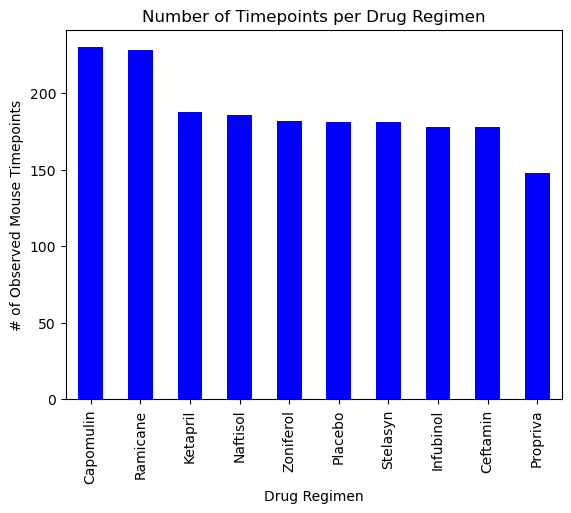

<Figure size 640x480 with 0 Axes>

In [136]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

by_regimen_df = mouse_df_clean["Drug Regimen"].value_counts()
by_regimen_df.plot(kind="bar", figsize=(6.4,4.8), color= "b") 
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()


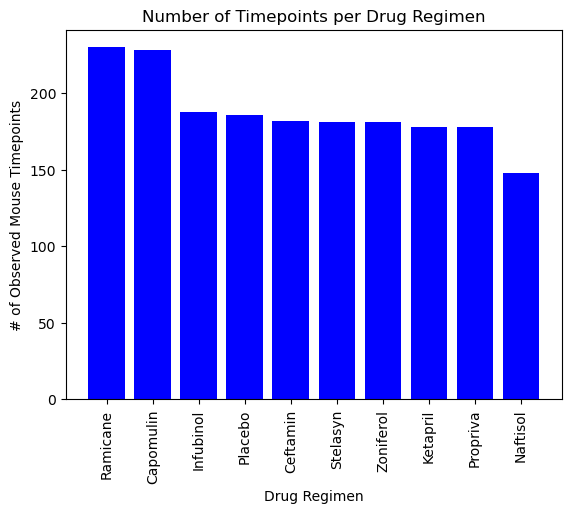

<Figure size 640x480 with 0 Axes>

In [137]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis = mouse_df_clean["Drug Regimen"].unique()
y_axis= mouse_df_clean["Drug Regimen"].value_counts()
tick_locations = [value for value in x_axis]
plt.figure(figsize=(6.4,4.8))
plt.bar(x_axis, y_axis, color='b', align="center")
plt.xticks(rotation="vertical")
# Set a title and axis-labels for the chart
plt.title("Number of Timepoints per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()
plt.tight_layout()

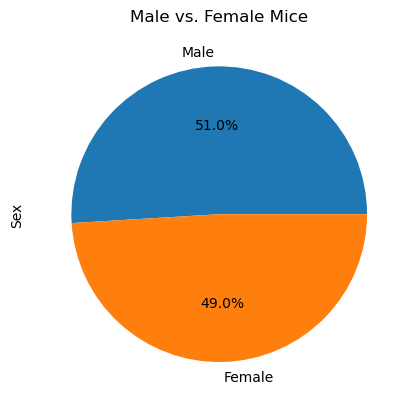

<Figure size 640x480 with 0 Axes>

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
by_gender_df = mouse_df_clean["Sex"].value_counts()
by_gender_df.plot(kind="pie", figsize=(6.4,4.8), autopct='%1.1f%%') 
plt.title("Male vs. Female Mice")
plt.show()
plt.tight_layout()


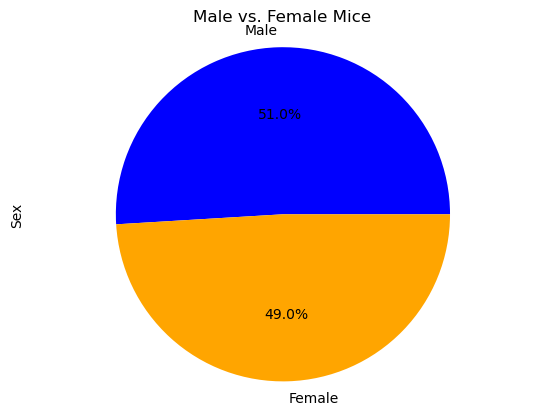

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender = mouse_df_clean["Sex"].unique()
gender_count= mouse_df_clean["Sex"].value_counts()
colors = ["blue","orange"]
plt.pie(gender_count, labels=gender, colors=colors, autopct="%1.1f%%", startangle=0)
#Create axes which are equal so we have a perfect circle
plt.title("Male vs. Female Mice")
plt.ylabel("Sex")
plt.axis("equal")
plt.show()


## Quartiles, Outliers and Boxplots

In [157]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_per_mouse= mouse_df_clean.groupby(["Mouse ID","Drug Regimen"])["Timepoint"].max()
greatest_timepoint_per_mouse=greatest_timepoint_per_mouse.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_mouse_df=greatest_timepoint_per_mouse.merge(mouse_df_clean, on= ["Mouse ID","Timepoint","Drug Regimen"], how="left")

#Dataframe showing the final tumor volume for treatment regimens: Capomulin, Ramicane, Infubinol, and Ceftamin
final_tumor_volume=merged_mouse_df.loc[(merged_mouse_df["Drug Regimen"] == "Capomulin") | (merged_mouse_df["Drug Regimen"] == "Ramicane") | 
(merged_mouse_df["Drug Regimen"] == "Infubinol") | (merged_mouse_df["Drug Regimen"] == "Ceftamin"),:]
final_tumor_volume_sorted=final_tumor_volume.sort_values(["Drug Regimen"])
final_tumor_volume_sorted


,Mouse ID,Drug Regimen,Timepoint,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
115,l897,Capomulin,45,Male,17,19,38.846876,1
85,j119,Capomulin,45,Female,7,23,38.125164,1
87,j246,Capomulin,35,Female,21,21,38.753265,1
192,u364,Capomulin,45,Male,18,17,31.023923,3
66,g316,Capomulin,45,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
91,j913,Ramicane,45,Female,4,17,31.560470,1
93,j989,Ramicane,45,Male,8,19,36.134852,1
96,k403,Ramicane,45,Male,21,16,22.050126,1
119,m546,Ramicane,45,Male,18,16,30.564625,1


In [140]:
# Put treatments into a list for for loop (and later for plot labels)
Treatment=["Capomulin","Ramicane","Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
TumorVolumeData=[]

# Locate the rows which contain mice on each drug and get the tumor volumes, add a subset
for treatment in Treatment:
    mice_on_drug=merged_mouse_df.loc[merged_mouse_df["Drug Regimen"] == treatment,"Tumor Volume (mm3)"]
    TumorVolumeData.append(mice_on_drug)
    # Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles=mice_on_drug.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - 1.5*iqr
    upper_bound = upperq + 1.5*iqr
    #for each treatment regimen in list, identify if tumor volume value is less than lower bound, or greater than upper bound
    outliers=mice_on_drug.loc[(mice_on_drug<lower_bound) | (mice_on_drug>upper_bound)]
    #print results using an f-string within a for loop
    print(f"{treatment} potential outliers: {outliers}")

 
    

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


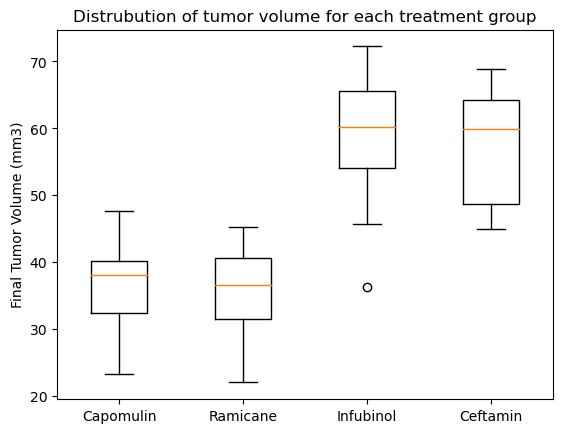

In [160]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(TumorVolumeData)
plt.title("Distrubution of tumor volume for each treatment group")
plt.xticks([1,2,3,4], Treatment)
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

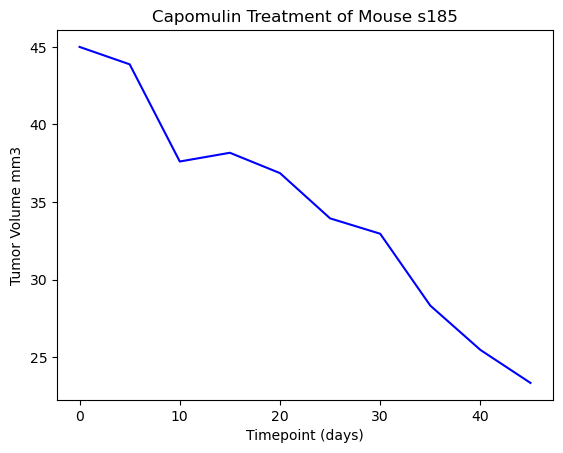

In [107]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Refined_df= mouse_df_clean[["Tumor Volume (mm3)","Timepoint","Mouse ID","Drug Regimen","Weight (g)"]]
#Create a dataframe that identifies one mouse treated with Capomulin only
Capomulin_df1=Refined_df.loc[(Refined_df["Drug Regimen"]=="Capomulin") & (Refined_df["Mouse ID"]=="s185"), :]
x_axis_cap=Capomulin_df1["Timepoint"]
y_axis_cap=Capomulin_df1["Tumor Volume (mm3)"]
plt.plot(x_axis_cap, y_axis_cap, color="blue")
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume mm3")
plt.show()

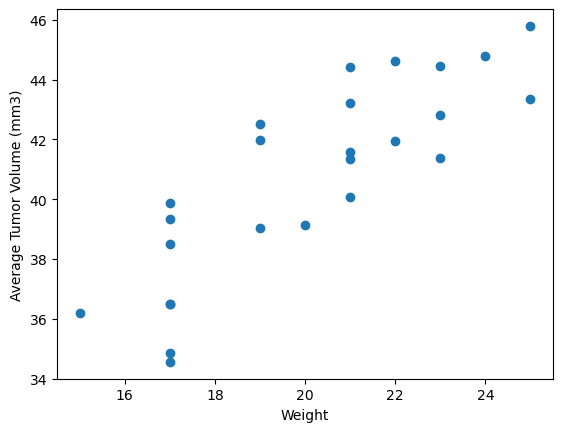

In [117]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
#Create a dataframe that filters out only mice on Capomulin
Capomulin_df2=Refined_df.loc[(Refined_df["Drug Regimen"]=="Capomulin"), :]
#group by mouse ID to determine average values for tumor volume and mouse weight for each mouse
Capomulin_df_avg= Capomulin_df2.groupby(["Mouse ID"]).mean()
x_axis_mw = Capomulin_df_avg["Weight (g)"]
y_axis_tv = Capomulin_df_avg["Tumor Volume (mm3)"]
plt.scatter(x_axis_mw, y_axis_tv)
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()


## Correlation and Regression

y = 0.95x + 21.55
The correlation between mouse weight and average tumor volume is 0.84


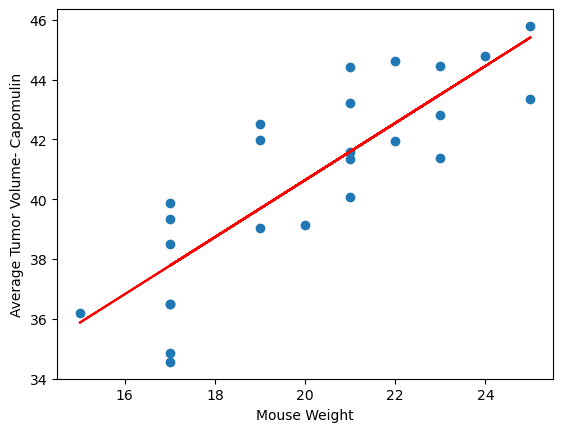

In [169]:
#Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis_mw,y_axis_tv)
regress_values = x_axis_mw * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)
print(f"The correlation between mouse weight and average tumor volume is {str(round(rvalue,2))}")

#Plot the line on top of the original scatter plot
plt.scatter(x_axis_mw, y_axis_tv)
plt.xlabel("Weight")
plt.ylabel("Average Tumor Volume (mm3)")
plt.plot(x_axis_mw,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Mouse Weight')
plt.ylabel('Average Tumor Volume- Capomulin')
plt.show()

